In [3]:
cd /content/drive/MyDrive/CNN

[Errno 2] No such file or directory: '/content/drive/MyDrive/CNN'
/content


In [4]:
!unzip /content/drive/MyDrive/IBM/Flowers-Dataset.zip

unzip:  cannot find or open /content/drive/MyDrive/IBM/Flowers-Dataset.zip, /content/drive/MyDrive/IBM/Flowers-Dataset.zip.zip or /content/drive/MyDrive/IBM/Flowers-Dataset.zip.ZIP.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [8]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/flowers",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [11]:
model = Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(300, activation = "relu"))

In [16]:
model.add(Dense(300, activation = "relu"))

In [17]:
model.add(Dense(5,activation="softmax"))

In [18]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [19]:
len(a_flowers)

135

In [20]:
model.fit(a_flowers, epochs= 1,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

135/135 [==============================] - 770s 6s/step - loss: 4.4591 - accuracy: 0.4387 - val_loss: 1.0186 - val_accuracy: 0.6069


In [21]:
model.save("flowers.h5")

In [ ]:
#Testing the Model

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [23]:
model = load_model("/content/flowers.h5")

In [40]:
img = image.load_img("/content/drive/MyDrive/IBM/flowers/dandelion/10043234166_e6dd915111_n.jpg",target_size=(256,256))

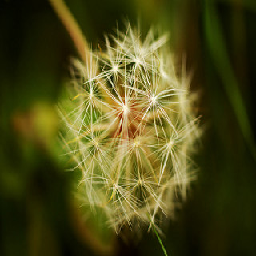

In [41]:
img

In [27]:
x = image.img_to_array(img)

In [28]:
x

array([[[22., 48., 11.],
        [20., 51., 10.],
        [17., 54., 11.],
        ...,
        [43., 82., 29.],
        [40., 80., 27.],
        [39., 78., 23.]],

       [[23., 51., 13.],
        [22., 53., 12.],
        [19., 56., 12.],
        ...,
        [40., 80., 27.],
        [40., 80., 27.],
        [40., 79., 24.]],

       [[19., 51., 10.],
        [20., 56., 12.],
        [22., 58., 12.],
        ...,
        [36., 81., 24.],
        [38., 81., 28.],
        [38., 81., 27.]],

       ...,

       [[ 5., 19.,  2.],
        [ 7., 19.,  5.],
        [ 0., 18.,  4.],
        ...,
        [17., 67.,  6.],
        [22., 68.,  4.],
        [19., 70.,  3.]],

       [[ 4., 19.,  0.],
        [ 6., 18.,  4.],
        [24., 33.,  2.],
        ...,
        [17., 65.,  5.],
        [22., 61.,  4.],
        [20., 64.,  3.]],

       [[ 5., 17.,  5.],
        [18., 32.,  6.],
        [39., 46.,  4.],
        ...,
        [18., 63.,  4.],
        [22., 62.,  2.],
        [23., 65.,  2.]]

In [29]:
x.ndim

3

In [30]:
x = np.expand_dims(x,axis= 0)

In [31]:
x.ndim

4

In [32]:
pred = model.predict(x)

In [33]:
pred

array([[1.2044031e-33, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [34]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [35]:
np.argmax(pred)

1

In [36]:
hi[np.argmax(pred)]

'dandelion'